#### Pandas

Pandas是基于Numpy的专业数据分析工具，可以灵活高效的处理各种数据集，也是我们后期分析案例的神器。它提供了两种类型的数据结构，分别是**DataFrame**和**Series**，我们可以简单粗暴的把DataFrame理解为Excel里面的一张表，而Series就是表中的某一列，后面学习和用到的所有Pandas操作，都是基于这些表和列进行的操作（基本操作、运算操作、特征类操作、关联类操作）。

Series（一维数据）与 DataFrame（二维数据），这两种数据结构足以处理金融、统计、社会科学、工程等领域里的大多数典型用例。对于 R 用户，DataFrame 提供了比 R 语言 data.frame 更丰富的功能。Pandas 基于 NumPy 开发，可以与其它第三方科学计算支持库完美集成。

这里有一点需要强调，Pandas和Excel、SQL相比，只是调用和处理数据的方式变了，核心都是对源数据进行一系列的处理，在正式处理之前，更重要的是谋定而后动，明确分析的意义，理清分析思路之后再处理和分析数据，往往事半功倍。


#### Pandas的部分优势：

+ 处理浮点与非浮点数据里的缺失数据，表示为 NaN（Not a Number）；
+ 大小可变：插入或删除 DataFrame 等多维对象的列；
+ 自动、显式数据对齐：显式地将对象与一组标签对齐，也可以忽略标签，在 Series、DataFrame 计算时自动与数据对齐；
+ 强大、灵活的 **分组（group by）** 功能：拆分-应用-组合数据集，聚合、转换数据；
+ 把 Python 和 NumPy 数据结构里不规则、不同索引的数据轻松地转换为 DataFrame 对象； 
+ 基于智能标签，对大型数据集进行切片、花式索引、子集分解等操作；
+ 直观地**合并（merge）** 、 **连接（join）** 数据集；
+ 灵活地重塑（reshape）、透视（pivot）数据集；
+ 轴支持结构化标签：一个刻度支持多个标签；
+ 成熟的 IO 工具：读取文本文件（CSV 等支持分隔符的文件）、Excel 文件、数据库等来源的数据，利用超快的 HDF5 格式保存 / 加载数据；
+ 时间序列：支持日期范围生成、频率转换、移动窗口统计、移动窗口线性回归、日期位移等时间序列功能。

#### 一些其他说明：  
- Pandas 速度很快。Pandas 的很多底层算法都用 Cython (opens new window)优化过。然而，为了保持通用性，必然要牺牲一些性能，如果专注某一功能，完全可以开发出比 Pandas 更快的专用工具。
- Pandas 是 statsmodels (opens new window)的依赖项，因此，Pandas 也是 Python 中统计计算生态系统的重要组成部分。
- Pandas 已广泛应用于金融领域。

In [4]:
import numpy as np
import pandas as pd

#### 数据结构

|维数|名称|描述|
|--|--|--|
|1|Series|带标签的一维同构数组|
|2|DataFrame|带标签的二维异构表格|

**为什么有多个数据结构？**  
- Pandas 数据结构就像是低维数据的容器。比如，DataFrame 是 Series 的容器，Series 则是标量的容器。使用这种方式，可以在容器中以字典的形式插入或删除对象。
- 多维数组存储二维或三维数据时，编写函数要注意数据集的方向（时间和截面），这对用户来说是一种负担。在Pandas中，轴的概念主要是为了给数据赋予更直观的语义，即用“更恰当”的方式表示数据集的方向。这样做可以让用户编写数据转换函数时，少费点脑子。
- 处理 DataFrame 等表格数据时，index（行）或 columns（列）比 axis 0 和 axis 1 更直观。

补充说明：
- Pandas 里，绝大多数方法都不改变原始的输入数据，而是复制数据，生成新的对象。一般来说，保持原始输入数据不变是更稳妥的做法。

#### 数据结构(Series)
**Series** 是带标签的一维数组，可存储整数、浮点数、字符串、Python 对象等类型的数据。轴标签统称为索引。调用**pd.Series**函数即可创建 Series：  

`s = pd.Series(data, index, dtype, name, copy)`  

上述代码中，data 支持以下数据类型：

+ 列表、字典
+ numpy.ndarray
+ 标量值

#### 创建Series

从ndarray 创建Series 时，index 长度必须与多维数组的长度一致。没有指定index 参数时，创建数值型索引，即 [0, ..., len(data) - 1]：

In [6]:
pd.Series(np.random.random(5))

0    0.029929
1    0.904466
2    0.061709
3    0.579436
4    0.988681
dtype: float64

Series 本质上是DataFrame 的单个列。 因此，你可以使用索引参数以与之前相同的方式为Series 分配列值。 但是，Series 没有列名，它只有一个总名称：

In [7]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

Series 也可从字典创建：

In [10]:
pd.Series({'2015 Sales':30,'2016 Sales':35,'2017 Sales':40})

2015 Sales    30
2016 Sales    35
2017 Sales    40
dtype: int64

从标量值创建Series 时，若提供索引，则Series 按索引长度重复该标量值：

In [13]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### Series的基本操作

获得索引：`Series.index`   
获得数据：`Series.values`  
获得名称：`Series.name`

Series类型在运算中会自动对齐相同标签的数据：

In [4]:
import pandas as pd
a = pd.Series([1,2,3], ['c','d','e'])
b = pd.Series([9,8,7,6], ['a','b','c','d'])

a + b

a    NaN
b    NaN
c    8.0
d    8.0
e    NaN
dtype: float64

#### 数据结构(DataFrame)

**DataFrame** 是由多种类型的列构成的二维标签数据结构，类似于 Excel 、SQL 表，或 Series 对象构成的字典。DataFrame 是最常用的 Pandas 对象，可以使用**pd.DataFrame**构造函数来生成：  

`pd.DataFrame(data, index, columns)`

与 Series 一样，DataFrame 支持多种类型的输入数据：

+ 由一维ndarray、列表、元组或Series构成的字典
+ 二维ndarray
+ Series
+ DataFrame

除了数据，还可以有选择地传递 index（行标签）和 columns（列标签）参数。传递了行索引或列标签，就可以确保生成的 DataFrame 里包含了相应的值。若没有传递轴标签，则按默认情况创建从0开始的数值型索引。

#### 创建DataFrame

首先**导入对应的库**：

In [5]:
import pandas as pd
import numpy as np

从二维ndarray对象创建：

In [6]:
pd.DataFrame(np.random.random(20).reshape(4,-1))

,0,1,2,3,4
0,0.463928,0.510951,0.366974,0.610238,0.286486
1,0.699067,0.267980,0.436591,0.422344,0.810583
2,0.830439,0.076869,0.821463,0.931393,0.462638
3,0.528072,0.210659,0.496478,0.549961,0.138997


另一种常见的方法是通过列表类型的字典创建，即初始化一个字典，其键是列标签，其值是列的值，这里列的顺序并不重要：

In [11]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


上述构造函数为列标签分配值，并使用从0开始的递增计数作为行标签。  
DataFrame中使用的行标签称为索引。我们可以在构造函数中使用**索引参数index**为其赋值：

In [12]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]}, index=['ok','fine'])

,Yes,No
ok,50,131
fine,21,2


也可通过下述方法为行标签赋值：

In [17]:
df = pd.DataFrame({'Yes': ['a', 'b'], 'No': [131, 2]})
df.index = ['ok','fine']
df

,Yes,No
ok,a,131
fine,b,2


index 和 columns 属性分别用于访问行、列标签：

In [18]:
df.index

Index(['ok', 'fine'], dtype='object')

In [19]:
df.columns

Index(['Yes', 'No'], dtype='object')

values属性用于访问DataFrame的元素值：

In [34]:
df.values

array([['a', 131],
       ['b', 2]], dtype=object)

DataFrame 的列可以有不同的数据类型：

In [35]:
df.dtypes

Yes    object
No      int64
dtype: object

**Excercise：**  

    结合上述实例，练习如何创建DataFrame和Series这两种数据结构。
    已知 Series 操作与上节课提到的 ndarray 类似，支持大多数 NumPy 函数，亦支持索引切片，练习使用方括号+冒号的形式对Series进行索引。

#### 文件读取与写入
数据可以以多种不同的形式和格式存储，目前最通用的格式之一是**csv文件**，以及**xls文件**。  
>CSV（Comma-Separated Values，逗号分隔值，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。CSV 是一种通用的、相对简单的文件格式，被用户、商业和科学广泛应用。

*你可以从Github下载课件及所使用的文件到本地*

**读取数据**

能够手动创建DataFrame和Series非常方便。但在大多数情况下，我们实际上不会手动创建数据，我们将使用已经存在的数据。  

从本地计算机读取名为'stock_data.csv'的文件：

In [36]:
df = pd.read_csv('stock_data.csv', index_col=0)
#df = pd.read_excel("stock_data.xls", sheet_name='price')

**写入数据**

将数据写入文件通常比从一个文件中读取数据更容易，因为pandas会为你处理转换的麻烦。

read_csv（读取数据）的反义词是to_csv（写入数据）：

In [29]:
df.to_csv('stock_data_head.csv')
#df.to_excel('stock_data_head.xls', sheet_name='price')

对csv文件的操作非常简单，若需读写Excel文件，请使用read_excel和to_excel。

**Exercise:**
    
    请大家将需要读写的文件放在电脑的任意位置，并使用pandas实现文件的读写功能（注意路径名）。

#### 查看数据

**生成描述性统计信息**：快速计算数值型数据的关键统计指标，例如均值、标准差、最大值、最小值、分位数等。

In [37]:
df.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,7.370000e+02,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,2.018581e+07,11.002198,11.244084,10.789118,11.017123,11.010475,0.006649,0.093007,90858.378725,106162.360978
std,9.637208e+03,1.889141,1.976465,1.827325,1.908847,1.899236,0.343773,2.983851,70279.618800,96928.400735
min,2.017070e+07,7.770000,7.950000,7.750000,7.770000,7.770000,-1.440000,-10.018600,7829.000000,7891.632000
25%,2.018040e+07,9.360000,9.560000,9.210000,9.360000,9.360000,-0.170000,-1.530000,45415.130000,46596.916000
50%,2.019010e+07,10.890000,11.080000,10.610000,10.850000,10.850000,0.000000,0.000000,68256.230000,75595.631000
75%,2.019102e+07,12.280000,12.560000,12.020000,12.290000,12.280000,0.160000,1.414300,110826.680000,130335.838000
max,2.020072e+07,17.800000,18.180000,16.900000,17.950000,17.950000,1.540000,10.043700,543655.080000,814316.938000


**显示DataFrame的简单摘要**：展示的信息包括列的数据类型、非空值的数量、内存占用等。

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     737 non-null    object 
 1   trade_date  737 non-null    int64  
 2   open        737 non-null    float64
 3   high        737 non-null    float64
 4   low         737 non-null    float64
 5   close       737 non-null    float64
 6   pre_close   737 non-null    float64
 7   change      737 non-null    float64
 8   pct_chg     737 non-null    float64
 9   vol         737 non-null    float64
 10  amount      737 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 69.1+ KB


**Thinking：**

当你面临的数据对象非常庞大时，如何简要地查看它的头部或尾部？

Tips：**.head()** 和 **.tail()**

#### DataFrame的索引和切片

**选** 选择单列：`dataframe['colname']` 或 `dataframe.colname`

In [40]:
df['vol']

0      285487.23
1      332693.07
2      184201.74
3      226621.76
4      320102.62
         ...    
732     69776.46
733     51529.62
734     50503.45
735     50820.01
736     41711.00
Name: vol, Length: 737, dtype: float64

In [41]:
df.vol

0      285487.23
1      332693.07
2      184201.74
3      226621.76
4      320102.62
         ...    
732     69776.46
733     51529.62
734     50503.45
735     50820.01
736     41711.00
Name: vol, Length: 737, dtype: float64

选择多列：`dataframe[['colname1','colname2']]`

In [43]:
df[['open','close']]

,open,close
0,16.80,16.20
1,17.80,16.51
2,17.12,17.95
3,17.20,17.21
4,15.80,16.97
...,...,...
732,11.36,11.28
733,11.49,11.43
734,11.52,11.53
735,11.50,11.56


**增**  增加一列：`df['新列名'] = 新列值`，创建新列并赋值即可

In [50]:
df['new_col'] = range(1, len(df)+1)
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,new_col
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718,1
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842,2
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565,3
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486,4
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992,5


**改**  简单的更改：`df['旧列名'] = 某个值或者某列值`，以赋值形式对原列数值进行修改

In [51]:
df['new_col'] = df['new_col'] + 100
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,new_col
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718,101
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842,102
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565,103
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486,104
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992,105


**选（复杂索引）**  

索引用法总结如下：

|操作|句法|
|-|-|
|选择列|df[col]|
|用标签选择行|df.loc[label]|
|用整数位置选择行|df.iloc[value]|
|行切片|df[5:10]|
|用布尔向量选择行|df[bool_vec]|


In [65]:
import pandas as pd
df = pd.read_csv('multi_stock_data.csv', index_col=0)
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200728,300685.SZ,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
20200727,300685.SZ,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
20200724,300685.SZ,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
20200723,300685.SZ,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632
...,...,...,...,...,...,...,...,...,...,...
20200108,002350.SZ,6.20,6.52,6.01,6.05,5.93,0.12,2.0236,182015.88,111934.573
20200107,002350.SZ,5.75,6.07,5.75,5.93,5.72,0.21,3.6713,101464.57,59886.982
20200106,002350.SZ,5.65,5.74,5.65,5.72,5.69,0.03,0.5272,28396.10,16216.815


多行切片：`dataframe[start:stop]`

In [83]:
df[0:5]

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200728,300685.SZ,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
20200727,300685.SZ,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
20200724,300685.SZ,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
20200723,300685.SZ,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632


按标签（自定义索引）选择行：`dataframe.loc[]`

In [85]:
df.loc[20200729]

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200729,002747.SZ,15.58,16.69,15.40,16.53,15.60,0.93,5.9615,187518.29,300984.436
20200729,603288.SH,145.14,148.80,143.79,148.60,146.19,2.41,1.6485,54572.25,798579.731
20200729,002660.SZ,8.73,8.93,8.61,8.92,8.72,0.20,2.2936,63362.62,55703.310
20200729,002350.SZ,5.36,5.46,5.28,5.45,5.37,0.08,1.4898,42830.66,23080.964


按位置（整数索引）选择行：`dataframe.iloc[]`

In [74]:
df.iloc[0:5]

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200728,300685.SZ,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
20200727,300685.SZ,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
20200724,300685.SZ,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
20200723,300685.SZ,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632


同时索引行与列：

In [87]:
df.loc[20200729, ['open', 'close']]

,open,close
trade_date,,
20200729,76.88,79.53
20200729,15.58,16.53
20200729,145.14,148.60
20200729,8.73,8.92
20200729,5.36,5.45


In [77]:
df.iloc[0:5, 0:3]

,ts_code,open,high
trade_date,,,
20200729,300685.SZ,76.88,80.50
20200728,300685.SZ,76.24,79.43
20200727,300685.SZ,71.84,75.99
20200724,300685.SZ,76.56,78.44
20200723,300685.SZ,76.70,80.80


**布尔索引**：输出交易量大于平均交易量的行
1. 基于判断语句，输出布尔值

In [90]:
df['vol'] > df['vol'].mean()

trade_date
20200729    False
20200728    False
20200727    False
20200724    False
20200723    False
            ...  
20200108     True
20200107     True
20200106    False
20200103    False
20200102    False
Name: vol, Length: 689, dtype: bool

2. 将布尔值传入参数位置，Pandas会默认返回结果为True的行，丢掉结果为False的行

In [98]:
df[df['vol'] > df['vol'].mean()]

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200729,002747.SZ,15.58,16.69,15.40,16.53,15.60,0.93,5.9615,187518.29,300984.436
20200728,002747.SZ,15.68,15.98,15.22,15.60,15.38,0.22,1.4304,125663.79,195823.200
20200727,002747.SZ,16.15,16.16,15.15,15.38,16.20,-0.82,-5.0617,228584.90,355934.528
20200724,002747.SZ,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
20200723,002747.SZ,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
...,...,...,...,...,...,...,...,...,...,...
20200113,002350.SZ,6.50,6.62,6.41,6.54,6.71,-0.17,-2.5335,260810.94,169894.614
20200110,002350.SZ,6.05,6.71,5.97,6.71,6.10,0.61,10.0000,332168.68,215221.161
20200109,002350.SZ,6.28,6.37,5.92,6.10,6.05,0.05,0.8264,140280.25,85630.713


输出所有涨停的数据：

In [100]:
df[df['pct_chg'] > 9.9]

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200720,002747.SZ,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
20200709,002747.SZ,14.20,15.50,14.01,15.50,14.09,1.41,10.0071,267772.91,395199.486
20200616,002747.SZ,10.09,10.96,10.05,10.96,9.96,1.00,10.0402,177673.09,188478.610
20200206,002747.SZ,10.70,11.78,10.50,11.78,10.71,1.07,9.9907,256243.34,289982.744
20200109,002747.SZ,11.24,12.20,11.23,12.20,11.09,1.11,10.0090,204716.67,243318.704
20200331,603288.SH,116.00,125.17,115.00,125.17,113.79,11.38,10.0009,94435.99,1143524.901
20200325,002660.SZ,9.04,9.69,8.90,9.69,8.81,0.88,9.9886,320644.08,306849.646
20200617,002350.SZ,5.63,5.63,5.58,5.63,5.12,0.51,9.9609,114740.08,64590.758
20200324,002350.SZ,6.25,6.71,6.13,6.71,6.10,0.61,10.0000,284171.88,187961.023


**Excercise：**

请大家通过练习掌握使用数值+冒号、iloc、loc方法对行和列进行混合筛选，并理解这些方法的区别与适用的场景。

#### 删除指定的索引对象  

我们用drop方法删除指定的行或列：  

`dataframe.drop(label, axis = 0, index, columns, inplace = False)` 

- axis = 0（1）表示针对行（列）的操作，默认为0  
- inplace = True，则直接对原始对象进行修改；inplace = False，则保留原始对象不变，创建新对象返回修改的结果，默认为False。

对drop方法的使用通常有两种方式：
- labels=None, axis=0 的组合
- index 或columns 直接指定要删除的行或列

In [110]:
df.drop('ts_code', axis = 1).head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
20200729,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200728,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
20200727,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
20200724,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
20200723,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632


In [108]:
df.drop(columns = 'ts_code').head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
20200729,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
20200728,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
20200727,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
20200724,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
20200723,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632


#### 排序

Pandas 支持三种排序方式，按索引标签排序，按列里的值排序，按两种方式混合排序。

In [53]:
sort_df = df.sort_values('close', ascending = False) # 对列标签为close的列降序排序
sort_df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
2,002747.SZ,20200722,117.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565
3,002747.SZ,20200721,117.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486
4,002747.SZ,20200720,115.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
1,002747.SZ,20200723,117.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
476,002747.SZ,20180724,115.18,16.42,15.18,16.35,15.25,1.10,7.2131,189263.20,301483.183
0,002747.SZ,20200724,116.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
475,002747.SZ,20180725,116.16,16.26,15.81,15.90,16.35,-0.45,-2.7523,110424.70,176590.221
480,002747.SZ,20180718,115.60,16.15,15.37,15.69,15.52,0.17,1.1000,167440.56,263707.018
481,002747.SZ,20180717,114.60,15.75,14.60,15.52,14.70,0.82,5.5800,200447.43,307922.803
11,002747.SZ,20200709,114.20,15.50,14.01,15.50,14.09,1.41,10.0071,267772.91,395199.486


**Excercise：**

+ 请大家通过练习掌握使用sort_index方法分别对行和列进行排序。

**分组（Grouping）**

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

+ 分割：按条件把数据分割成多组；
+ 应用：为每组单独应用函数；
+ 组合：将处理结果组合成一个数据结构。

In [56]:
# 生成dataframe
import numpy as np
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8), 'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.137610,0.637040
1,bar,one,1.858841,-0.464412
2,foo,two,0.002757,0.696839
3,bar,three,0.550179,-1.302014
4,foo,two,-1.287711,0.871111
5,bar,two,-0.340326,0.497469
6,foo,one,0.591917,1.769741
7,foo,three,-1.185067,0.286390


In [57]:
# 先分组，再用 sum()函数计算每组的汇总数据：
df.groupby('A').sum()

,C,D
A,,
bar,2.068694,-1.268958
foo,-1.740493,4.261121


In [58]:
# 多列分组后，生成多层索引，也可以应用 sum 函数：
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.858841 -0.464412
    three  0.550179 -1.302014
    two   -0.340326  0.497469
foo one    0.729527  2.406781
    three -1.185067  0.286390
    two   -1.284954  1.567950

**行列级函数应用————Apply**

1. apply极其灵活高效，甚至可以说是重新定义了pandas的灵活性；
2. apply概念相对晦涩，需要结合具体案例去咀嚼和实践。
3. apply方法沿着 DataFrame 的轴应用函数，该方法支持 axis 参数，经常和 df.groupby 一起使用。


##### 场景一

我们拿到了一个数据集multi_stock_data.csv，里面包含着5个股票在2020年一段时间的日价格数据，我们想知道每个股票的最大涨幅（pct_chg）各自是多少？

In [68]:
df = pd.read_csv('multi_stock_data.csv')
best_perform = df.groupby('ts_code')['pct_chg'].apply(max).reset_index()
best_perform

,ts_code,pct_chg
0,002350.SZ,10.0372
1,002660.SZ,9.9886
2,002747.SZ,10.0402
3,300685.SZ,7.1859
4,603288.SH,10.0009


##### 场景二

我们拿到了5个股票在2020年一段时间的日价格数据，我们想知道每个股票的第二大交易发生在什么时间？

In [70]:
def get_second_largest(x):
    return x.iloc[1,:]

df_tmp = df.sort_values(['ts_code', 'amount'], ascending = False)
df_new = df_tmp.groupby('ts_code')[['trade_date','amount']].apply(get_second_largest).reset_index()
df_new['trade_date'].apply(int)

0    20200326
1    20200326
2    20200225
3    20200616
4    20200723
Name: trade_date, dtype: int64

**Excercise：**

+ 尝试使用agg()方法替代apply()方法获得上述两个场景中的结果，并理解二者的差异。

**合并(merge)，连接(join)与结合(concat)**

Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。

**结合（Concat）**：
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

**合并（Merge）**：
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

- left：一个DataFrame或Series的对象。

- right：另一个DataFrame或Series的对象。

- on：要加入的列或索引级别名称。必须在左右DataFrame和/或Series对象中找到。如果没有，且left_index和right_index是False，则DataFrames和/或Series对象的交叉点会被视作联接键。

- left_on：左侧DataFrame或Series中的列或索引用作键。可以是列名称，索引名称，也可以是长度等于DataFrame或Series长度的数组。

- right_on：右侧DataFrame或Series中的列或索引用作键。可以是列名称，索引名称，也可以是长度等于DataFrame或Series长度的数组。

- left_index：如果为True，则使用左侧DataFrame或Series中的索引（行标签）作为其连接键。对于具有MultiIndex（分层结构）的DataFrame或Series，级别数必须与正确的DataFrame或Series中的联接键数相匹配。

- right_index：与left_index正确的DataFrame或Series的用法相同

- how：'left'，'right'，'outer'，'inner'。默认为inner。how参数指定如何确定哪些键会被包括在所得到的表中。
         
**join()** 接受一个可选on参数，该参数可以是一列或多个列名，它指定传递的DataFrame内容将与DataFrame中的该列对齐。下列两个函数调用完全等效：
- left.join(right, on=key_or_keys)
- pd.merge(left, right, left_on=key_or_keys, right_index=True, how='left', sort=False)

In [36]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4))
print(df)

# 分解为多个pandas对象
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

          0         1         2         3
0  0.318365 -1.866500 -0.716669  0.825815
1 -0.085598  1.276368 -0.034125 -0.024688
2  0.121790 -0.714061  0.099623 -0.614508
3 -0.034452  0.643819  0.041877  0.814014
4  1.044606  0.460548 -0.477412 -0.591399
5 -0.669247  0.286293 -1.047403 -1.220839
6  0.455458 -0.741835 -0.143953  0.661785
7 -0.848841 -0.276372 -0.290300 -1.030009
8 -0.772374 -0.786079  0.892964 -0.512185
9  0.414735 -0.490402  0.208976  0.325413


,0,1,2,3
0,0.318365,-1.866500,-0.716669,0.825815
1,-0.085598,1.276368,-0.034125,-0.024688
2,0.121790,-0.714061,0.099623,-0.614508
3,-0.034452,0.643819,0.041877,0.814014
4,1.044606,0.460548,-0.477412,-0.591399
5,-0.669247,0.286293,-1.047403,-1.220839
6,0.455458,-0.741835,-0.143953,0.661785
7,-0.848841,-0.276372,-0.290300,-1.030009
8,-0.772374,-0.786079,0.892964,-0.512185
9,0.414735,-0.490402,0.208976,0.325413


In [35]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(left)
print(right)

pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [33]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

print(left)
print(right)

pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


**Exercise**：

将上述两个实例用join()方法实现，并思考join和merge的异同。

**可视化**

<AxesSubplot:>

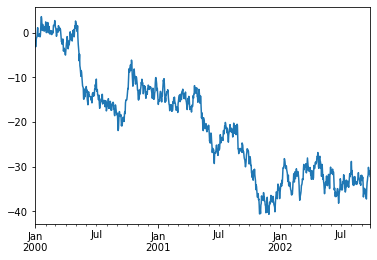

In [12]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.plot()

DataFrame 的 plot() 方法可以快速绘制所有带标签的列：

<Figure size 432x288 with 0 Axes>

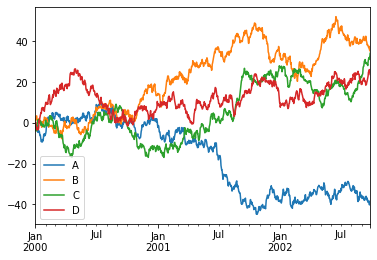

In [16]:
from matplotlib import pyplot as plt

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure()
df.plot()

plt.legend(loc='best')

**Exercise:**

1. 了解如何使用下列的函数：去重（df.drop_duplicates）, 去空值（df.dropna）

2. 已知 df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})，对于该DataFrame，删除数值重复的行

3. 随机生成一个5列包含随机数的dataframe，求哪一列的和是最小的。

4. 随机生成一个5列包含随机数的dataframe，返回最大的三个值的坐标。